In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from collections import Counter

import pandas as pd
import seaborn as sns
import matplotlib
import pylab

from matplotlib import pyplot as plt
from pylab import rcParams


import database
from snowballing.operations import load_work, load_citations, reload
from snowballing.graph import getcolors
%matplotlib inline

reload()
reload()
related = [x for x in load_work() if x.category in ("snowball", "ok" )]
types = Counter(x.place.type for x in related)
types

Counter({'Journal': 14, 'Conference': 42, 'Thesis': 5})

In [2]:
counter = Counter(x.place for x in related)
counter

Counter({J.Sci. Stat. Comput.: 1,
         SSDBM: 2,
         ESTC: 1,
         Thesis: 5,
         IPAW: 14,
         CCPE: 1,
         NBIS: 1,
         TaPP: 10,
         Procedia: 1,
         POLICY: 1,
         ISSTA: 1,
         eSoN: 2,
         JSM: 1,
         Comp. Stat.: 1,
         CiSE: 2,
         useR: 1,
         EDBT: 1,
         TGRS: 1,
         FNINF: 2,
         CLOUD: 1,
         JIB: 1,
         OSR: 1,
         AutoML: 1,
         IJDC: 1,
         Neuroscience: 1,
         ICSC: 1,
         SciPy: 1,
         CHI: 1,
         VLHCC: 1,
         VLDB: 1,
         Informatics: 1})

In [3]:
top = [(place, quantity)
 for place, quantity in counter.most_common()
 if quantity > 1
 if place.acronym != "Thesis"
]
top

[(IPAW, 14), (TaPP, 10), (SSDBM, 2), (eSoN, 2), (CiSE, 2), (FNINF, 2)]

In [4]:
%matplotlib notebook
sns.set(style='ticks', palette='BuGn') #Set2
rcParams['figure.figsize'] = 14, 3

<IPython.core.display.Javascript object>


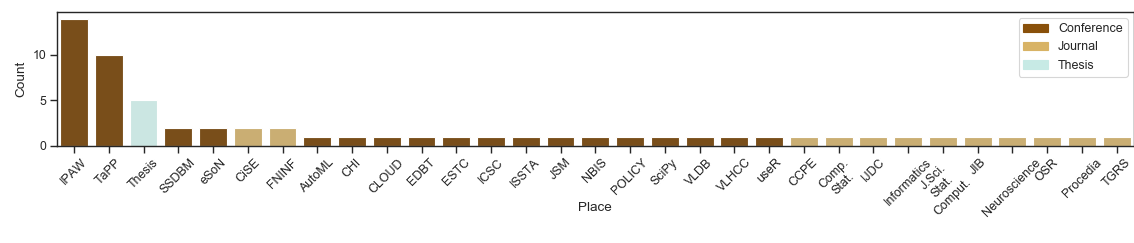

In [5]:
elements = sorted(counter.most_common(), key=lambda x: (-x[1], x[0].type, x[0].acronym))
rename = [
    ("\n".join(place.acronym.split()), quantity, place.type)
    for place, quantity in elements
]

TYPES = ['Conference', 'Journal', 'Thesis']

color_def = {
    name: tuple(x/255 for x in color)
    for name, color in zip(TYPES, getcolors())
}

colors = [
    color_def[place.type]
    for place, qtd in elements
]

df = pd.DataFrame(rename, columns=["Place", "Quantity", "Type"])
ax = sns.barplot(x="Place", y="Quantity", data=df, palette=colors)
plt.xticks(rotation=45)
legend_patches = [
    matplotlib.patches.Patch(color=color_def[label], label=label)
    for label in TYPES
]
ax.set(ylabel='Count')
plt.legend(handles=legend_patches)
plt.gcf().subplots_adjust(left=0.05, right=1, top=0.95, bottom=0.40)
rcParams['figure.figsize'] = 13, 3

ax.xaxis.labelpad = -15
plt.show()
plt.savefig("../../csur/figs/place.pdf")

In [6]:
sum(x for y, x in elements)

61